In [1]:
import pandas as pd
from io import StringIO

csv_data = '''
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0, 12.0,
'''

df = pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [21]:
from sklearn.impute  import SimpleImputer

imr = SimpleImputer(strategy='mean')
imr = imr.fit(df)

In [21]:
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [33]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


In [34]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
print(df)

   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1


In [35]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
# print(class_mapping)
df['classlabel'] = df['classlabel'].map(class_mapping)
print(df)

   color  size  price  classlabel
0  green     1   10.1           0
1    red     2   13.5           1
2   blue     3   15.3           0


In [36]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
print(inv_class_mapping)
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
print(df)

{0: 'class1', 1: 'class2'}
   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1


In [39]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)
class_le.inverse_transform(y)

[0 1 0]


array(['class1', 'class2', 'class1'], dtype=object)

In [40]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])

In [44]:
print(X)

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
ct = ColumnTransformer([("ohe", ohe, ['color'])])
print(ct.fit_transform(df))

# ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(X).toarray()

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [54]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [55]:
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavoids', 'Nonflavavnoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('class labels', np.unique(df_wine['Class label']))
print(df_wine.head())

class labels [1 2 3]
   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavoids  Nonflavavnoid phenols  Proanthocyanins  \
0           2.80      3.06                   0.28             2.29   
1           2.65      2.76                   0.26             1.28   
2           2.80      3.24                   0.30             2.81   
3           3.85      3.49                   0.24             2.18   
4           2.80      2.69                   0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                 

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# skf = StratifiedKFold(n_splits=5, random_state=0)
# for train_idx, test_idx in skf.split(X, y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
# print(len(X_train), len(X_test))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [75]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [124]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='auto')
lr2 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', multi_class='auto')

lr1.fit(X_train_std, y_train)
lr2.fit(X_train_std, y_train)

print('Training accuracy : {}, {}'.format(
    lr1.score(X_train_std, y_train), lr2.score(X_train_std, y_train)))
print('Test accuray : {}, {}'.format(
    lr1.score(X_test_std, y_test), lr2.score(X_test_std, y_test)))

Training accuracy : 0.9861111111111112, 0.9930555555555556
Test accuray : 1.0, 0.9705882352941176


In [81]:
lr1.intercept_

array([-0.38465851, -0.1719831 , -0.86478658])

In [82]:
lr1.coef_

array([[ 0.4301907 ,  0.        ,  0.        , -0.03024119,  0.        ,
         0.        ,  0.690199  ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.05889309,  1.30517875],
       [-0.84420036, -0.24867583, -0.18504986,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.56978824,
         0.38792722,  0.        , -0.5305128 ],
       [ 0.        ,  0.15451864,  0.        ,  0.        ,  0.        ,
         0.        , -0.74214069,  0.        ,  0.        ,  0.52162841,
        -0.5114503 , -0.3953969 ,  0.        ]])

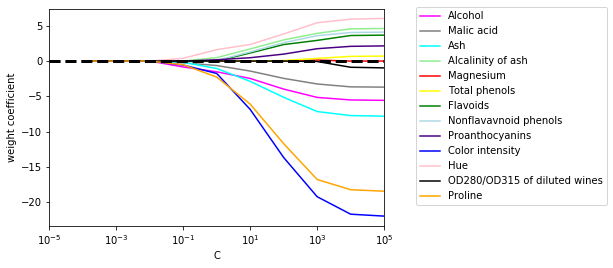

In [116]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = {'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange'}

weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.0 ** c, random_state=0,
                           solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0 ** c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1],
             color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim(10 ** (-5), 10**5)
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [117]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [125]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

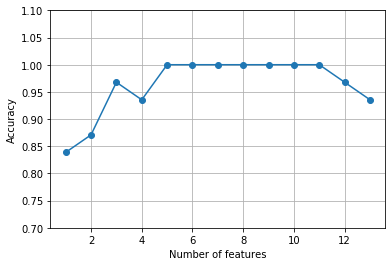

In [126]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [127]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [128]:
knn.fit(X_train_std, y_train)
print('Training accuracy : {}'.format(knn.score(X_train_std, y_train)))
print('Test accuracy : {}'.format(knn.score(X_test_std, y_test)))

Training accuracy : 0.9838709677419355
Test accuracy : 0.9444444444444444


In [129]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy : {}'.format(knn.score(X_train_std[:, k5], y_train)))
print('Test accuracy : {}'.format(knn.score(X_test_std[:, k5], y_test)))

Training accuracy : 0.9596774193548387
Test accuracy : 0.9629629629629629


In [131]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("({}) {:<30} {}".format(
        f + 1, feat_labels[indices[f]], importances[indices[f]]))

(1) Color intensity                0.18248261633081472
(2) Proline                        0.1586097743920862
(3) Flavoids                       0.1509479479780387
(4) OD280/OD315 of diluted wines   0.13198679742764793
(5) Alcohol                        0.10658906122519356
(6) Hue                            0.07824278809689272
(7) Total phenols                  0.060717598651490706
(8) Alcalinity of ash              0.03203319120917422
(9) Malic acid                     0.02539967832538343
(10) Proanthocyanins                0.022351122470445448
(11) Magnesium                      0.02207807404077187
(12) Nonflavavnoid phenols          0.014645160876579357
(13) Ash                            0.013916188975481143


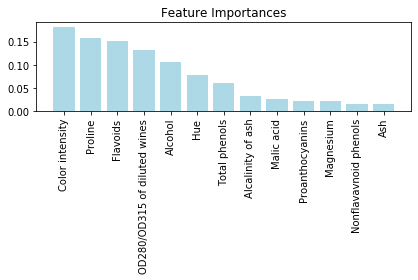

In [133]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue',
        align="center")
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()